In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import auc, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, mean_squared_error, r2_score, classification_report, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

In [3]:
# Load the dataset
df = pd.read_csv('./datasets/master_pima-indians-diabetes.csv')
df

,Pregnancies,GLucose,BloodPressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.isna().sum()

Pregnancies                 0
GLucose                     0
BloodPressure               0
Skin Thickness              0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [22]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [6]:
# Splitting features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [7]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [9]:
# Initialize classifiers
knn = KNeighborsClassifier()
log_reg = LogisticRegression(max_iter=1000, random_state=42)
naive_bayes = GaussianNB()

In [10]:
# Train classifiers
knn.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [11]:
# Evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


K-Nearest Neighbors Evaluation:
Accuracy: 0.69
Precision: 0.69
Recall: 0.69
F1 Score: 0.69
Mean Squared Error (MSE): 0.31
Mean Absolute Error (MAE): 0.31
R2 Score: -0.36
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       151
           1       0.56      0.51      0.54        80

    accuracy                           0.69       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.69      0.69      0.69       231

Confusion Matrix:
[[119  32]
 [ 39  41]]


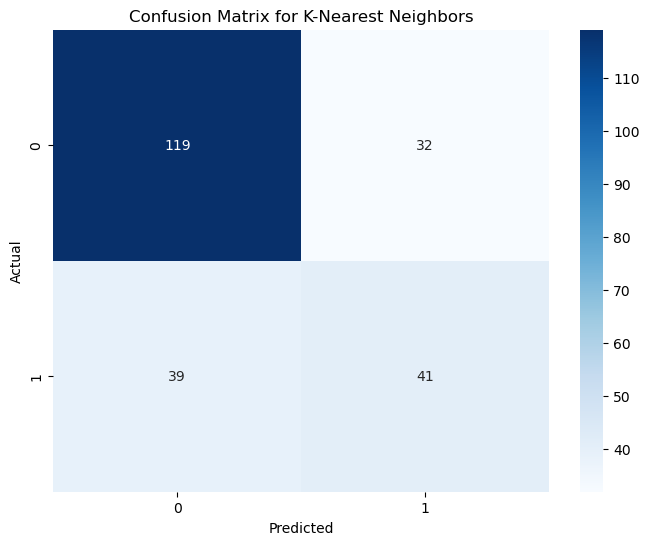


Logistic Regression Evaluation:
Accuracy: 0.74
Precision: 0.74
Recall: 0.74
F1 Score: 0.74
Mean Squared Error (MSE): 0.26
Mean Absolute Error (MAE): 0.26
R2 Score: -0.17
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

Confusion Matrix:
[[120  31]
 [ 30  50]]


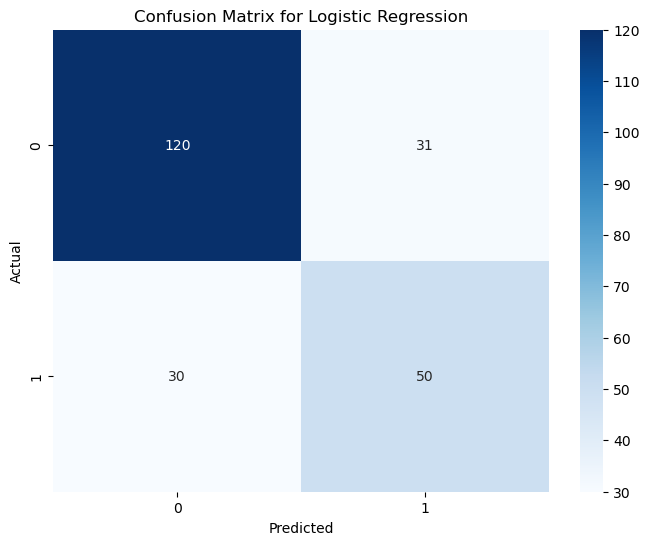


Naive Bayes Evaluation:
Accuracy: 0.74
Precision: 0.75
Recall: 0.74
F1 Score: 0.75
Mean Squared Error (MSE): 0.26
Mean Absolute Error (MAE): 0.26
R2 Score: -0.13
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231

Confusion Matrix:
[[119  32]
 [ 27  53]]


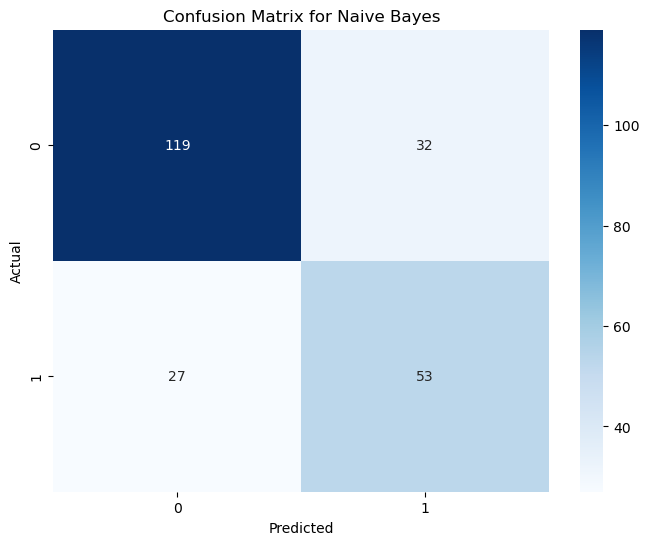

In [12]:
evaluate_model(knn, X_test, y_test, "K-Nearest Neighbors")
evaluate_model(log_reg, X_test, y_test, "Logistic Regression")
evaluate_model(naive_bayes, X_test, y_test, "Naive Bayes")

In [13]:
# Ensemble classifier using Stacking
estimators = [
    ('knn', knn),
    ('log_reg', log_reg),
    ('naive_bayes', naive_bayes)
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=3)
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=3,
                   estimators=[('knn', KNeighborsClassifier()),
                               ('log_reg',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42)),
                               ('naive_bayes', GaussianNB())],
                   final_estimator=LogisticRegression())


Stacking Ensemble Evaluation:
Accuracy: 0.74
Precision: 0.74
Recall: 0.74
F1 Score: 0.74
Mean Squared Error (MSE): 0.26
Mean Absolute Error (MAE): 0.26
R2 Score: -0.15
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.60      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

Confusion Matrix:
[[123  28]
 [ 32  48]]


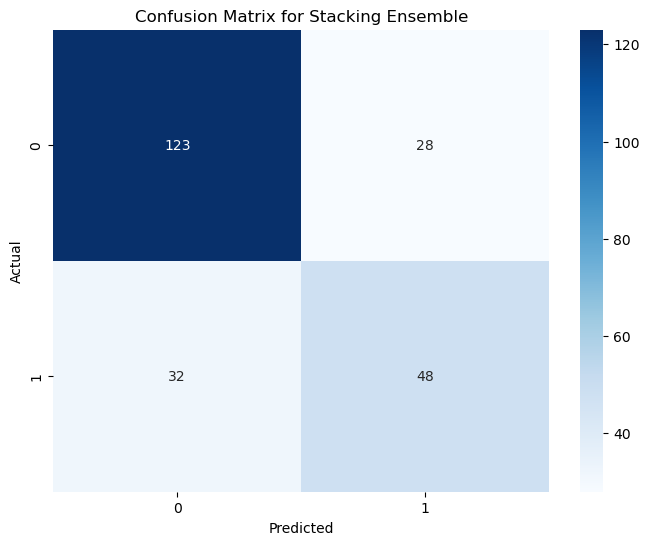

In [14]:
# Evaluate the stacking ensemble
evaluate_model(stacking_clf, X_test, y_test, "Stacking Ensemble")

In [15]:
# Hyperparameter tuning for ensemble method
param_grid = {
    'final_estimator__C': [0.1, 1, 10],
    'final_estimator__solver': ['liblinear', 'lbfgs']
}
grid_search = GridSearchCV(stacking_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=StackingClassifier(cv=3,
                                          estimators=[('knn',
                                                       KNeighborsClassifier()),
                                                      ('log_reg',
                                                       LogisticRegression(max_iter=1000,
                                                                          random_state=42)),
                                                      ('naive_bayes',
                                                       GaussianNB())],
                                          final_estimator=LogisticRegression()),
             param_grid={'final_estimator__C': [0.1, 1, 10],
                         'final_estimator__solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [16]:
print("\nBest parameters for Stacking Ensemble:", grid_search.best_params_)
print(f"Best accuracy from Grid Search: {grid_search.best_score_:.2f}")


Best parameters for Stacking Ensemble: {'final_estimator__C': 1, 'final_estimator__solver': 'lbfgs'}
Best accuracy from Grid Search: 0.78


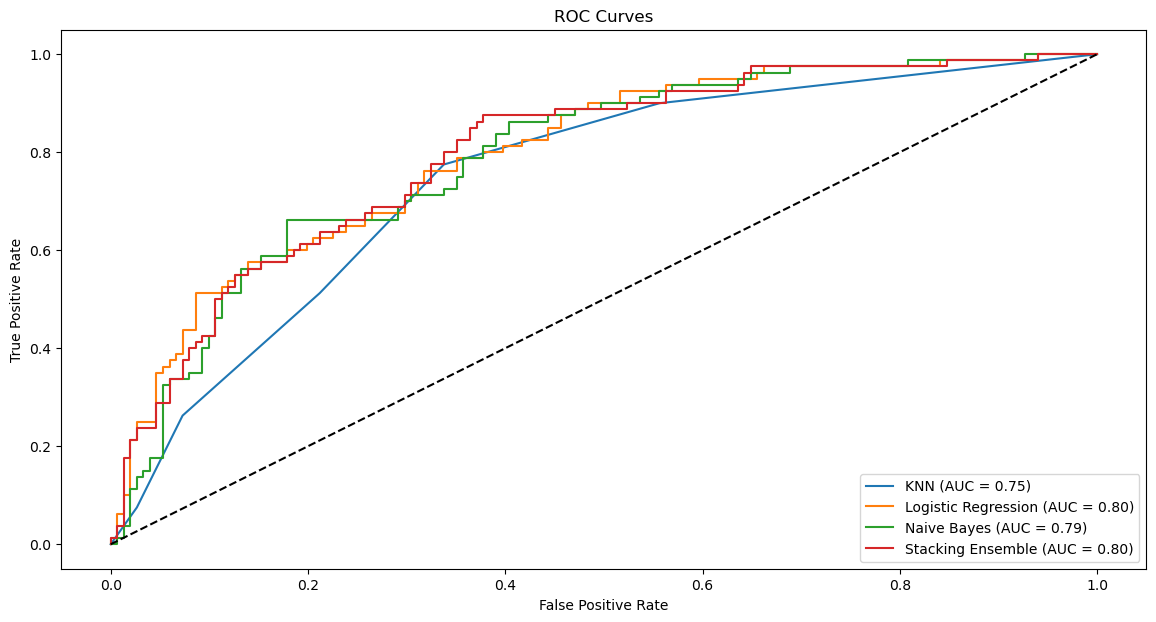

In [17]:
# Plotting ROC curve for each model
plt.figure(figsize=(14, 7))

for clf, name in zip([knn, log_reg, naive_bayes, stacking_clf], ['KNN', 'Logistic Regression', 'Naive Bayes', 'Stacking Ensemble']):
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test)[:, 1] if y_test.nunique() == 2 else clf.predict_proba(X_test).max(axis=1)
        fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=y_test.max())
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

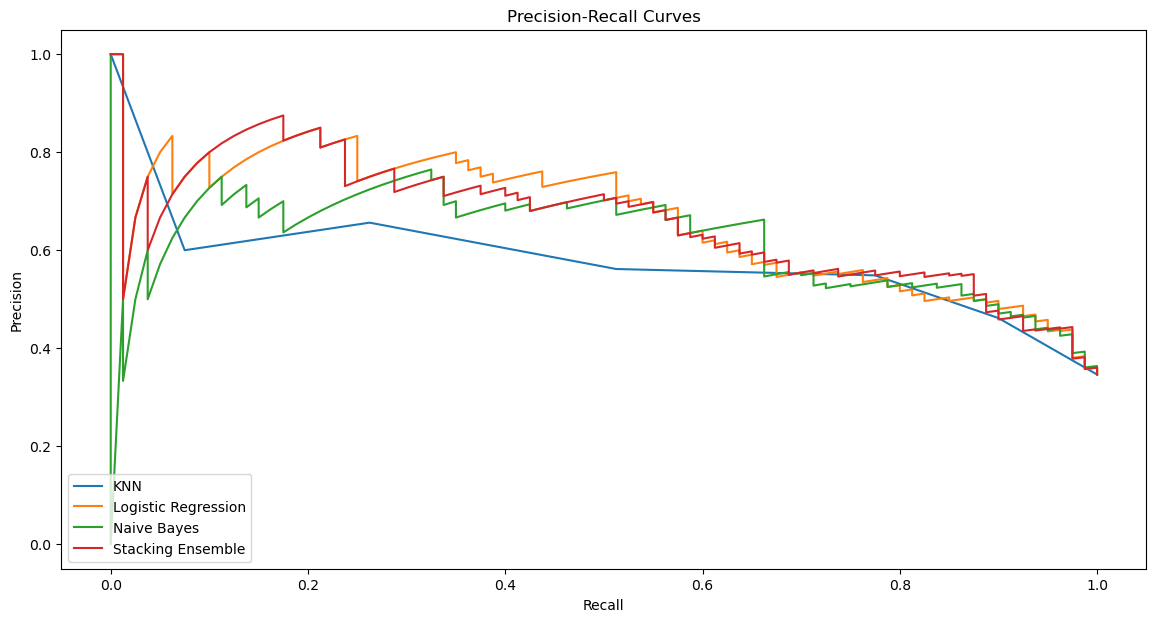

In [18]:
# Precision-Recall Curves
plt.figure(figsize=(14, 7))

for clf, name in zip([knn, log_reg, naive_bayes, stacking_clf], ['KNN', 'Logistic Regression', 'Naive Bayes', 'Stacking Ensemble']):
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test)[:, 1] if y_test.nunique() == 2 else clf.predict_proba(X_test).max(axis=1)
        precision, recall, _ = precision_recall_curve(y_test, y_prob, pos_label=y_test.max())
        plt.plot(recall, precision, label=f'{name}')

plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

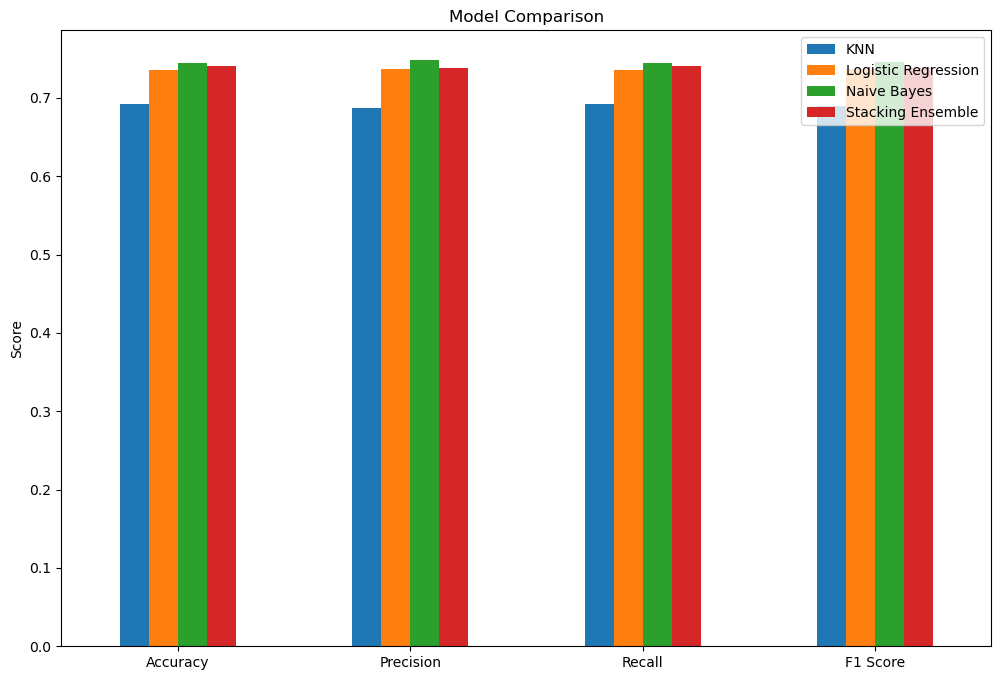

In [19]:
# Bar chart for model comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
results = {
    'KNN': [accuracy_score(y_test, knn.predict(X_test)),
            precision_score(y_test, knn.predict(X_test), average='weighted'),
            recall_score(y_test, knn.predict(X_test), average='weighted'),
            f1_score(y_test, knn.predict(X_test), average='weighted')],
    'Logistic Regression': [accuracy_score(y_test, log_reg.predict(X_test)),
                            precision_score(y_test, log_reg.predict(X_test), average='weighted'),
                            recall_score(y_test, log_reg.predict(X_test), average='weighted'),
                            f1_score(y_test, log_reg.predict(X_test), average='weighted')],
    'Naive Bayes': [accuracy_score(y_test, naive_bayes.predict(X_test)),
                    precision_score(y_test, naive_bayes.predict(X_test), average='weighted'),
                    recall_score(y_test, naive_bayes.predict(X_test), average='weighted'),
                    f1_score(y_test, naive_bayes.predict(X_test), average='weighted')],
    'Stacking Ensemble': [accuracy_score(y_test, stacking_clf.predict(X_test)),
                          precision_score(y_test, stacking_clf.predict(X_test), average='weighted'),
                          recall_score(y_test, stacking_clf.predict(X_test), average='weighted'),
                          f1_score(y_test, stacking_clf.predict(X_test), average='weighted')]
}

df_results = pd.DataFrame(results, index=metrics)
df_results.plot(kind='bar', figsize=(12, 8))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

In [20]:
df_results

,KNN,Logistic Regression,Naive Bayes,Stacking Ensemble
Accuracy,0.692641,0.735931,0.744589,0.740260
Precision,0.686837,0.736722,0.748735,0.737455
Recall,0.692641,0.735931,0.744589,0.740260
F1 Score,0.689091,0.736312,0.746309,0.738627
